(300, 300)


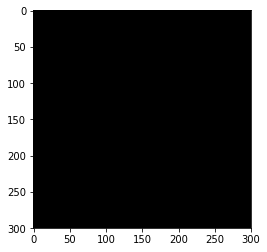

(1, 4, 2)


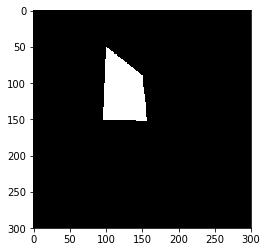

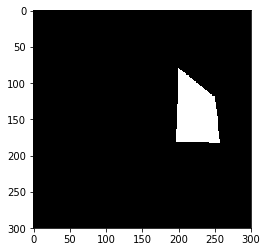

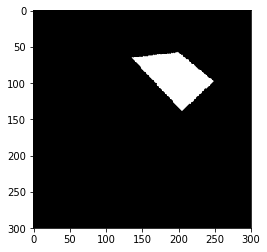

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow


image =np.ones([300,300],dtype=np.uint8)

print(image.shape[0:2])

mask = np.zeros(image.shape, dtype=np.uint8)
plt.imshow(mask,'gray')
plt.show()

roi_corners = np.array([[(100,50),(97,150),(156,152),(150,90)]], dtype=np.int32)
print(roi_corners.shape)


cv2.fillPoly(mask, roi_corners,1)

# apply the mask
masked_image = cv2.bitwise_and(image, mask)
num_rows,num_cols=masked_image.shape[0:2]
plt.imshow(masked_image,'gray')
plt.show()
# save the result

masked_image = np.float32(masked_image)


M = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),45,1)
translation_matrix = np.float32([ [1,0,100], [0,1,30] ])
img_translation = cv2.warpAffine(masked_image, translation_matrix, (num_cols , num_rows))
plt.imshow(img_translation,'gray')
plt.show()


img_rotation=cv2.warpAffine(img_translation,M,(num_cols,num_rows))
plt.imshow(img_rotation,'gray')
plt.show()


In [0]:
def findcorner(img, window_size, k, thresh):
  
    dy, dx = np.gradient(img)
    print(dy)
    print(dx)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]

    cornerList = []
    featurelist = []
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = int(window_size/2)
    plt.imshow(color_img)
    plt.show()
    #Loop through image and find our corners
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            #Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            r = det - k*(trace**2)
#             print(r)
            #If corner response is over threshold, color the point and add to corner list
            if r > thresh:
#                 print (x, y, r)
       
                cornerList.append([y, x, r])
                color_img.itemset((y, x, 0),0)
                color_img.itemset((y, x, 1), 0)
                color_img.itemset((y, x, 2), 255)
        
                
    plt.imshow(color_img)
    plt.show()
    
    return color_img,cornerList
      

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


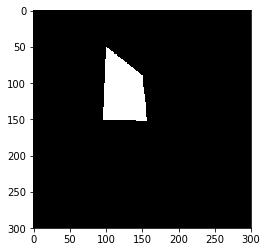

Finding Corners...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


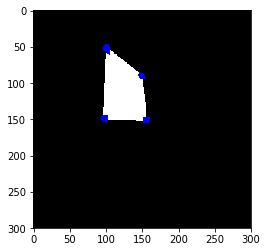

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


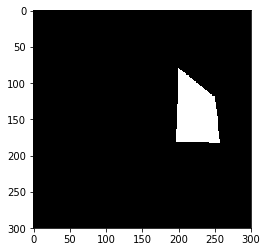

Finding Corners...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


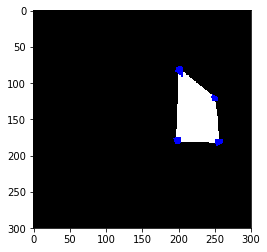

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


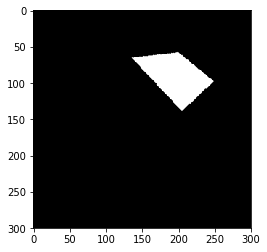

Finding Corners...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


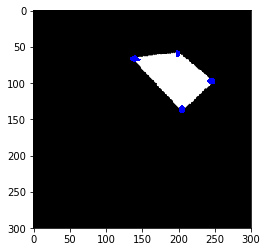

In [5]:
finalimage , cornerList = findcorner(masked_image,10,0.04,3.0)
finalimage2 , cornerList2 = findcorner(img_translation,10,0.04,3.0)
finalimage3 , cornerList3 = findcorner(img_rotation,10,0.04,3.0)


cornerList=np.asarray(cornerList)


roi_corners = np.array([[(100,50),(97,150),(156,152),(150,90)]], dtype=np.int32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11370.233023405075
339
[[148.925      98.075005    8.430467 ]
 [ 53.046726  101.373825    9.174322 ]
 [150.80232   155.15117     9.360608 ]
 [ 90.57576   149.24243     5.4005666]]
(4, 3)
11370.233053445816
339
[[ 83.04673   201.37383     9.174322 ]
 [178.925     198.075       8.430467 ]
 [180.80232   255.15117     9.360608 ]
 [120.57576   249.24243     5.4005666]]
(4, 3)
6095.505990117788
281
[[136.17722   204.4557      8.221445 ]
 [ 66.36471   139.74118     6.6470046]
 [ 97.545456  245.31169     8.664345 ]
 [ 59.275     198.825       3.59504  ]]
(4, 3)
83


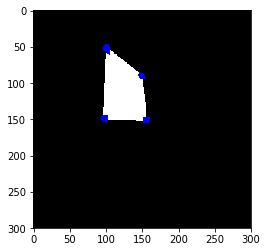

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


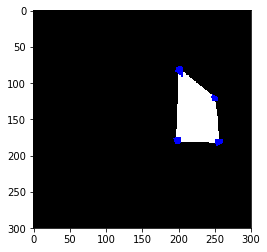

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


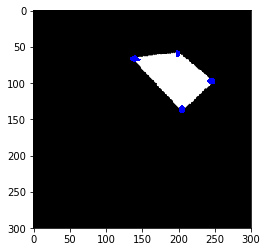

In [7]:


def kmeanscalc(Z):

      # convert to np.float32
      Z = np.float32(Z)

      # define criteria, number of clusters(K) and apply kmeans()
      criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
      K = 4
      ret,label,center=cv2.kmeans(Z,K,None,criteria,20,cv2.KMEANS_PP_CENTERS)
      center=cv2.kmeans(Z,K,None,criteria,20,cv2.KMEANS_PP_CENTERS)[2]
      print(ret)
      print(label.shape[0])
#       print(label)
      print(center)
      print(center.shape[0:2])
      # Now convert back into uint8, and make original image
      center = np.uint8(center)
      return center

center=kmeanscalc(cornerList)

center2=kmeanscalc(cornerList2)

center3=kmeanscalc(cornerList3)

print(center2[0][0])
plt.imshow(finalimage)
plt.show()
plt.imshow(finalimage2)
plt.show()
plt.imshow(finalimage3)



In [0]:
def euclideanandangle(corner):
  
  
  buffer = corner.astype(float)
  distance=[]
  distance2=[]
  distance3=[]
  distance4=[]
  for i in range(1,4):
        distance.append(math.sqrt(((buffer[0][0]-buffer[i][0])**2)+((buffer[0][1]-buffer[i][1])**2)))
        
  for i in range(0,4):
      if i == 1:
        continue
      distance2.append(math.sqrt(((buffer[1][0]-buffer[i][0])**2)+((buffer[1][1]-buffer[i][1])**2)))
    
  for i in range(0,4):
      if i==2:
        continue
      distance3.append(math.sqrt(((buffer[2][0]-buffer[i][0])**2)+((buffer[2][1]-buffer[i][1])**2)))
  for i in range(0,4):
        if i ==3:
          continue
        distance4.append(math.sqrt(((buffer[3][0]-buffer[i][0])**2)+((buffer[3][1]-buffer[i][1])**2)))

    

    
  return distance,distance2,distance3,distance4
    
    
    

In [0]:
distances1 = euclideanandangle(center)

distances2 = euclideanandangle(center2)

distances3 = euclideanandangle(center3)



distances1=np.asarray(distances1)
distances2=np.asarray(distances2)
distances3=np.asarray(distances3)


In [0]:
#Time to match the lines 


def tmatcher(test1,test2):
  
    matchlist=[]
    for j in range(0,4):
      diff=0.0
      for i in range(0,3):
            diff+=(test1[0][i]-test2[j][i])
      if diff<0.5 and diff>-0.5:
        print(diff)
        matchlist.append(j)
    
    for j in range(0,4):
      diff=0.0
      for i in range(0,3):
            diff+=(test1[1][i]-test2[j][i])
      if diff<0.5 and diff>-0.5:
        print(diff)
        matchlist.append(j)

    for j in range(0,4):
      diff=0.0
      for i in range(0,3):
            diff+=(test1[2][i]-test2[j][i])
      if diff<0.5 and diff>-0.5:
        print(diff)
        matchlist.append(j)
     
    for j in range(0,4):
      diff=0.0
      for i in range(0,3):
            diff+=(test1[3][i]-test2[j][i])
      if diff<0.5 and diff>-0.5:
        print(diff)
        matchlist.append(j)
        

    return matchlist

  
  
def rmatcher(test1,test2):
  
    matchlist=[]
    for j in range(0,4):
      diff=0.0
      for i in range(0,3):
            diff+=(test1[0][i]-test2[j][i])
      if diff<1.5 and diff>-0.5:
        print(diff)
        matchlist.append(j)
    
    for j in range(0,4):
      diff=0.0
      for i in range(0,3):
            diff+=(test1[1][i]-test2[j][i])
      if diff<1.5 and diff>-0.5:
        print(diff)
        matchlist.append(j)

    for j in range(0,4):
      diff=0.0
      for i in range(0,3):
            diff+=(test1[2][i]-test2[j][i])
      if diff<1.5 and diff>-0.5:
        print(diff)
        matchlist.append(j)
     
    for j in range(0,4):
      diff=0.0
      for i in range(0,3):
            diff+=(test1[3][i]-test2[j][i])
      if diff<1.5 and diff>-0.5:
        print(diff)
        matchlist.append(j)
        

    return matchlist
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0
0.0
0.0
0.0
-0.028649731862024908
1.291955513744199
0.8860478857627427
1.050677969634279


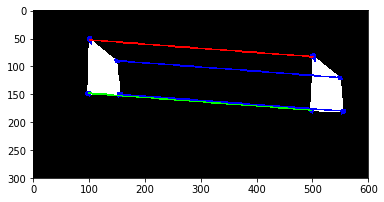

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


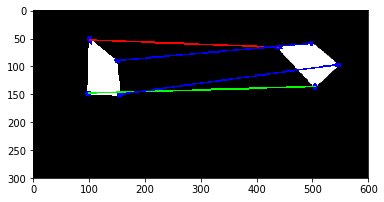

[1, 0, 2, 3]
[0, 1, 2, 3]


In [17]:
matchfor1in2=tmatcher(distances1,distances2)
matchfor1in3=rmatcher(distances1,distances3)


newimage1=np.hstack((finalimage,finalimage2))

newimage2=np.hstack((finalimage,finalimage3))

lineThickness = 2
cv2.line(newimage1, (center[0][1],center[0][0]), (center2[matchfor1in2[0]][1]+300,center2[matchfor1in2[0]][0]), (0,255,0), lineThickness)
cv2.line(newimage1, (center[1][1],center[1][0]), (center2[matchfor1in2[1]][1]+300,center2[matchfor1in2[1]][0]), (255,0,0), lineThickness)
cv2.line(newimage1, (center[2][1],center[2][0]), (center2[matchfor1in2[2]][1]+300,center2[matchfor1in2[2]][0]), (0,0,255), lineThickness)
cv2.line(newimage1, (center[3][1],center[3][0]), (center2[matchfor1in2[3]][1]+300,center2[matchfor1in2[3]][0]), (0,0,255), lineThickness)

cv2.line(newimage2, (center[0][1],center[0][0]), (center3[matchfor1in3[0]][1]+300,center3[matchfor1in3[0]][0]), (0,255,0), lineThickness)
cv2.line(newimage2, (center[1][1],center[1][0]), (center3[matchfor1in3[1]][1]+300,center3[matchfor1in3[1]][0]), (255,0,0), lineThickness)
cv2.line(newimage2, (center[2][1],center[2][0]), (center3[matchfor1in3[2]][1]+300,center3[matchfor1in3[2]][0]), (0,0,255), lineThickness)
cv2.line(newimage2, (center[3][1],center[3][0]), (center3[matchfor1in3[3]][1]+300,center3[matchfor1in3[3]][0]), (0,0,255), lineThickness)





plt.imshow(newimage1)
plt.show()


plt.imshow(newimage2)
plt.show()

print(matchfor1in2)
print(matchfor1in3)

In [12]:
xarray = np.array([[center[0][0],center[0][1],1,0,0,0],
                   [0,0,0,center[0][0],center[0][1],1],
                   [center[1][0],center[1][1],1,0,0,0],
                   [0,0,0,center[1][0],center[1][1],1],
                  [center[2][0],center[2][1],1,0,0,0],
                   [0,0,0,center[2][0],center[2][1],1]
                  ])
print(xarray)


yarray = np.array([center3[matchfor1in3[0]][0],
                   center3[matchfor1in3[0]][1],
                  center3[matchfor1in3[1]][0],
                  center3[matchfor1in3[1]][1],
                  center3[matchfor1in3[2]][0],
                  center3[matchfor1in3[2]][1]
                  ]
                  )
print(yarray)

h = np.linalg.lstsq(xarray, yarray, rcond=None)[0]
print(h[4])
theta=math.asin(h[3])*180/math.pi
print('The rotation is : ',theta,'degrees')
print(h)
print('The translation is',h[5],h[2])

[[148  98   1   0   0   0]
 [  0   0   0 148  98   1]
 [ 53 101   1   0   0   0]
 [  0   0   0  53 101   1]
 [150 155   1   0   0   0]
 [  0   0   0 150 155   1]]
[136 204  66 139  97 245]
0.694521306032097
The rotation is :  44.92194145360759 degrees
[ 0.71444383 -0.70927873 99.77162885  0.70614278  0.69452131 31.42778085]
The translation is 31.427780852241426 99.77162885076558
